# Datan analysointia

Tämä on Jupyter-notebook, jossa ThingSpeakista ladattua csv-muotoista säädataa voidaan analysoida.
Jupyter-notebook on ympäristö, jossa voidaan käyttää esimerkiksi Python-kieltä ohjelmointiin sekä Markdown-kieltä dokumentointiin.
Notebook koostuu soluista, joiden sisältö on Python- tai Markdown-tyyppisiä.

## Datan lataaminen

Datana on csv-tiedostoja, joissa kaikissa on viisi saraketta:
- `datetime`: aikaleima
- `entry_id`: ThingSpeak-kanavaan syötetyn datatietueen järjestysnumero.
- `temperature`: Sääaseman anturin tuottama **lämpötila**.
- `humidity`: Sääaseman anturin tuottama **ilmankosteus**.

Kukin mittaus on tiedostoissa yhtenä rivinä.

Analysointiin käytetään Pythonin Pandas-kirjastoa, jolla voidaan lukea ja käsitellä taulukkomuotoista dataa.
Kuvaajan piirtämiseen käytetään Matplotlib-kirjaston Pyplot-moduulia.

In [72]:
## Ladattavien tiedostojen nimet
filename0 = 'Petri_1-2023-04-27.csv'
filename1 = 'Petri_1-2023-05-04.csv'
filename2 = 'Petri_1-2023-05-11.csv'
filename3 = 'Petri_1-2023-05-18.csv'
## Sarakkeiden otsikot
hnames = ["datetime", "entry_id", "temperature", "humidity", "uptime"]
## Ladataan Pandas- ja Numpy-kirjastot.
import pandas as pd
import numpy as np
## Ladataan kukin csv-tiedosto omaan Pandas-dataframe-objektiin.
## CSV:n sarake-erottimena pilkku, desimaalierottimena piste.
## Käytetään edellä lueteltuja sarakkeiden otsikoita tiedostoissa olevien sijaan.
df0 = pd.read_csv(filename0, sep=',', decimal='.', names=hnames, header=0)
df0['datetime'] = pd.to_datetime(df0['datetime'])
df0.set_index('datetime', inplace=True)
df1 = pd.read_csv(filename1, sep=',', decimal='.', names=hnames, header=0)
df1['datetime'] = pd.to_datetime(df1['datetime'])
df1.set_index('datetime', inplace=True)
df2 = pd.read_csv(filename1, sep=',', decimal='.', names=hnames, header=0)
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)
df3 = pd.read_csv(filename1, sep=',', decimal='.', names=hnames, header=0)
df3['datetime'] = pd.to_datetime(df3['datetime'])
df3.set_index('datetime', inplace=True)
## Yhdistetään taulukot yhdeksi isommaksi taulukoksi laittamalla ne peräkkäin.
df = pd.concat([df0, df1, df2, df3])
## Taulukon alkua ja loppua tulostuu näkyviin sekä taulukon koko.
df

,entry_id,temperature,humidity,uptime
datetime,,,,
2023-04-20 00:02:11+00:00,4456,17.7,19.0,142343337
2023-04-20 00:04:42+00:00,4457,17.7,19.1,142494379
2023-04-20 00:09:24+00:00,4458,17.7,19.1,142775867
2023-04-20 00:14:55+00:00,4459,17.6,19.1,143107555
2023-04-20 00:17:01+00:00,4460,17.6,19.1,143233488
...,...,...,...,...
2023-05-03 23:38:58+00:00,11064,11.8,27.9,7754479
2023-05-03 23:45:35+00:00,11065,11.7,28.0,8151419
2023-05-03 23:49:12+00:00,11066,11.7,27.9,8367733


## Kuvaajan piirtäminen

Piirretään datasta kuvaaja, jossa $x$-akselina on mittausaika, vasempana $y$-akselina lämpötila ja oikeana $y$-akselina suhteellinen ilmankosteus. Piirretään lämpötila oranssilla ja ilmankosteus sinisellä käyrällä.

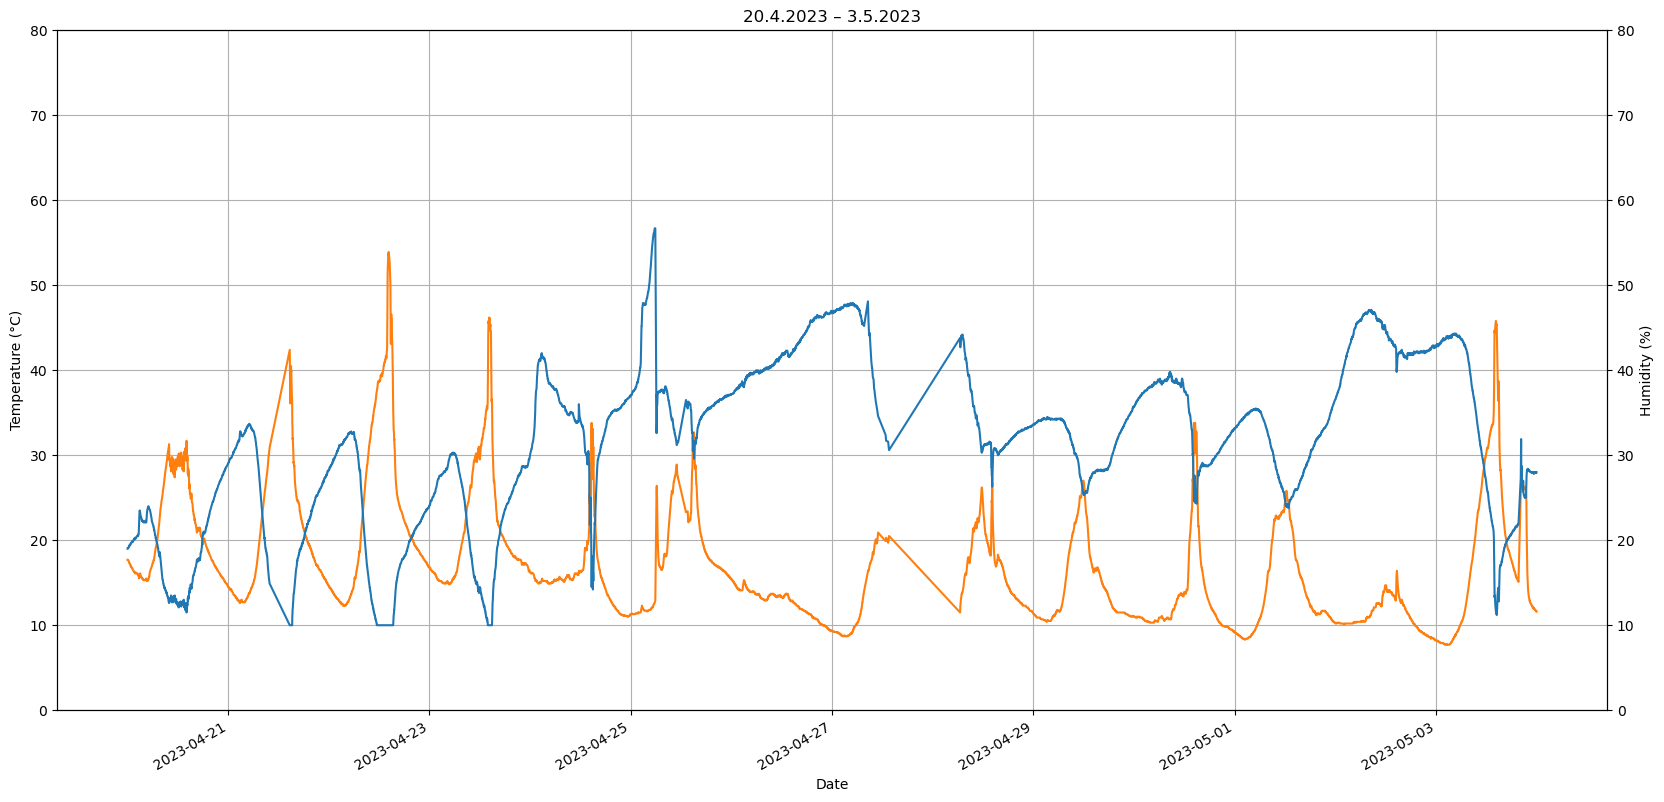

In [83]:
## Ladataan matplotlib-kirjaston pyplot.
import matplotlib.pyplot as plt
## Otetaan taulukosta vainhalutut sarakket.
tdata = df[["temperature", "humidity"]]
## Poimitaan ensimmäisen ja viimeisen näytteen ajat.
fdate = tdata.index[0]
ldate = tdata.index[-1]
## Muodostetaan kuvaajan otsikko, jossa on aloituksen päiväys ja lopeutspäiväys.
title = str(fdate.day) + "." + str(fdate.month) + "." + str(fdate.year) + " – " + str(ldate.day) + "." + str(ldate.month) + "." + str(ldate.year)
## Otetaan piirto-objektista esiin tarvittavat aliobjektit, joille voidaan säätää ominaisuuksia.
fig, ax = plt.subplots()
## Asetetaan piirroksen otsikko.
plt.title(title)
## Asetetaan kuvaajan koko.
fig.set_figwidth(20)
fig.set_figheight(10)
## Piirretään kuvaajat ja ruudukko.
tdata["temperature"].plot(ax=ax, style='-', color="C1")
plt.grid(visible=True)
tdata["humidity"].plot(ax=ax, secondary_y=True, style='-', color="C0")
## y-akseleiden ja x-akselin otsikot
ax.set_ylabel("Temperature (°C)")
ax.right_ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Date")
## Käytetään molemmille y-akseleille samaa skaalaa 0...80.
ax.set_ylim([0, 80])
ax.right_ax.set_ylim([0, 80])
## Piirretään muodostettu kuva näkyviin.
plt.show()